# Evaluation of resident time #

Formula to evaluate ideal resident time for 1 reactor
$$ E(t)=\dfrac{1}{\tau}e^{-t/\tau} $$ 

Where $ \tau=\dfrac{Q}{V} $ where $Q$ is the volumetric flow rate and $V$ is the Volume.

Formula to evaluate ideal comulative time
$$ F(t) = 1-e^{-t/\tau} $$

In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt 

Reading Numerical simualtions files

In [2]:
WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\A4I-R10-025_I-Phyc\04_FLUENT'
div='40'
file_Enum=r'time-outlet-'+ div + '.his'
file_Cnum=r'time-outlet-commulative-' + '40' + '.his'
file_EPS=r'rtd-rfile-UDS-Repatching.out'
file_CPS=r'rtd-rfile_UDS_NO_Repatching.out'
case_Enum=os.path.join(WorkingDir,file_Enum)
case_Cnum=os.path.join(WorkingDir,file_Cnum)
case_EnumPS=os.path.join(WorkingDir,file_EPS)
case_CnumPS=os.path.join(WorkingDir,file_CPS)

In [3]:
dE=pd.read_csv(case_Enum, sep=' ', skiprows=11 , names=['t_num','E_num'])
dE=dE.iloc[:-1,:]

In [4]:
dC=pd.read_csv(case_Cnum, sep=' ', skiprows=11 , names=['t_num','C_num'])
dC=dC.iloc[:-1,:]

In [5]:
num_mean_E=11319.9 #evaluated from fluent

In [6]:
dE_PS=pd.read_csv(case_EnumPS, sep=' ', skiprows=3 , names=['iter','E_numPS','t_numPS'])

In [7]:
dC_PS=pd.read_csv(case_CnumPS, sep=' ', skiprows=3 , names=['iter','C_numPS','t_numCPS'])

## Characteristic of the reactor ##

In [8]:
#Q= 0.000347/1020   # m^3/s
Q= 2.31/998
V=3.2*2.5*3.0 # be carefull with units 
tau=V/Q
print(tau)

10368.83116883117


In [9]:
t=np.linspace (0, 65000,100)

In [10]:
E_t=(1/tau)*np.exp(-t/tau)

In [11]:
F_t=1-np.exp(-t/tau)

In [12]:
teta=t/tau
E_teta=np.exp(-teta)
E_teta_2=teta*np.exp(-teta)

In [13]:
tnumE=dE[['t_num']].to_numpy(dtype='float64')

In [14]:
tnumC=dC[['t_num']].to_numpy(dtype='float64')

In [15]:
tnumEPS=dE_PS[['t_numPS']].to_numpy(dtype='float64')

In [16]:
tnumCPS=dC_PS[['t_numCPS']].to_numpy(dtype='float64')

In [17]:
E_num=dE[['E_num']].to_numpy(dtype='float64')

In [18]:
C_num=dC[['C_num']].to_numpy(dtype='float64')

In [19]:
E_numPS=dE_PS[['E_numPS']].to_numpy(dtype='float64')/10

In [20]:
C_numPS=dC_PS[['C_numPS']].to_numpy(dtype='float64')/10

In [21]:
I0=sp.integrate.simpson(E_numPS,tnumEPS,axis=0)

In [22]:
I1=sp.integrate.simpson(E_numPS*tnumEPS,tnumEPS,axis=0)

In [23]:
I0P=sp.integrate.simpson(E_num,tnumE,axis=0)

In [24]:
I1P=sp.integrate.simpson(E_num*tnumE,tnumE,axis=0)

In [25]:
tau_num=I1/I0

In [26]:
tau_num_P=I1P/I0P
print(I0P,I1P,tau_num_P)

[4435281.23883334] [5.12048285e+10] [11544.88874902]


In [27]:
print(I0,I1,tau_num)

[0.36692943] [3818.10861424] [10405.56650536]


In [28]:
C_num=C_num/100

In [29]:
pdf_E=E_num/I0P

In [30]:
pdf_E_C=(1-C_num)/num_mean_E

In [31]:
theta_E=tnumE/tau_num_P  #/num_mean_E #tau numerical

In [32]:
#plt.ioff()

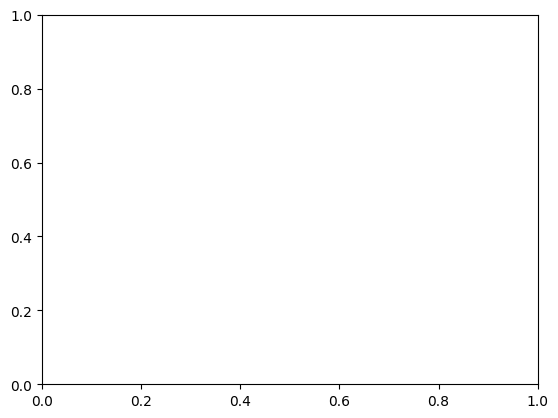

In [33]:
fig, ax = plt.subplots()

In [34]:
plt.ioff()

In [35]:
fig, ax = plt.subplots(1,3,figsize=(15,10))
fig.tight_layout(pad=2.5)

### Plot 0 ###

In [36]:
ax[0].plot(teta, E_t*tau,label='Ideal')
#ax[0].plot(t, E_t,label='Ideal')
scale=1022/2646

In [37]:
ax[0].plot(theta_E,pdf_E*tau_num_P,linestyle='--',marker='s',label='Numerical-DPM')
ax[0].plot(tnumEPS[:8000]/tau_num,E_numPS[:8000]/I0*tau_num,linestyle='--',marker='s',label='Numerical-PS')

In [38]:
ax[0].legend()
ax[0].set_xlabel(r'$ \theta $')
ax[0].set_ylabel(r'E( $ \theta $ )')
ax[0].title.set_text('RT')

### Plot 2 ###

In [39]:
ax[1].plot(t, E_t,label='Ideal')
ax[1].plot(tnumC,pdf_E_C,linestyle='--',marker='s',label='Numerical')
ax[1].set_xlabel(r' t [sec]')
ax[1].set_ylabel(r'E(t)')
ax[1].legend()
ax[1].title.set_text('RT-from-Comm')

### Plot 3 ###

In [40]:
ax[2].plot(t,F_t,label='Ideal')

In [41]:
ax[2].plot(tnumC,C_num, linestyle='--',marker='s',label='Numerical-DPM')
ax[2].plot(tnumCPS,C_numPS/I0, linestyle='-.',marker='s',label='Numerical-PS')

In [42]:
ax[2].set_xlabel(r' t [sec]')
ax[2].set_ylabel(r'C(t)')
ax[2].title.set_text('Comulative function')
ax[2].legend()


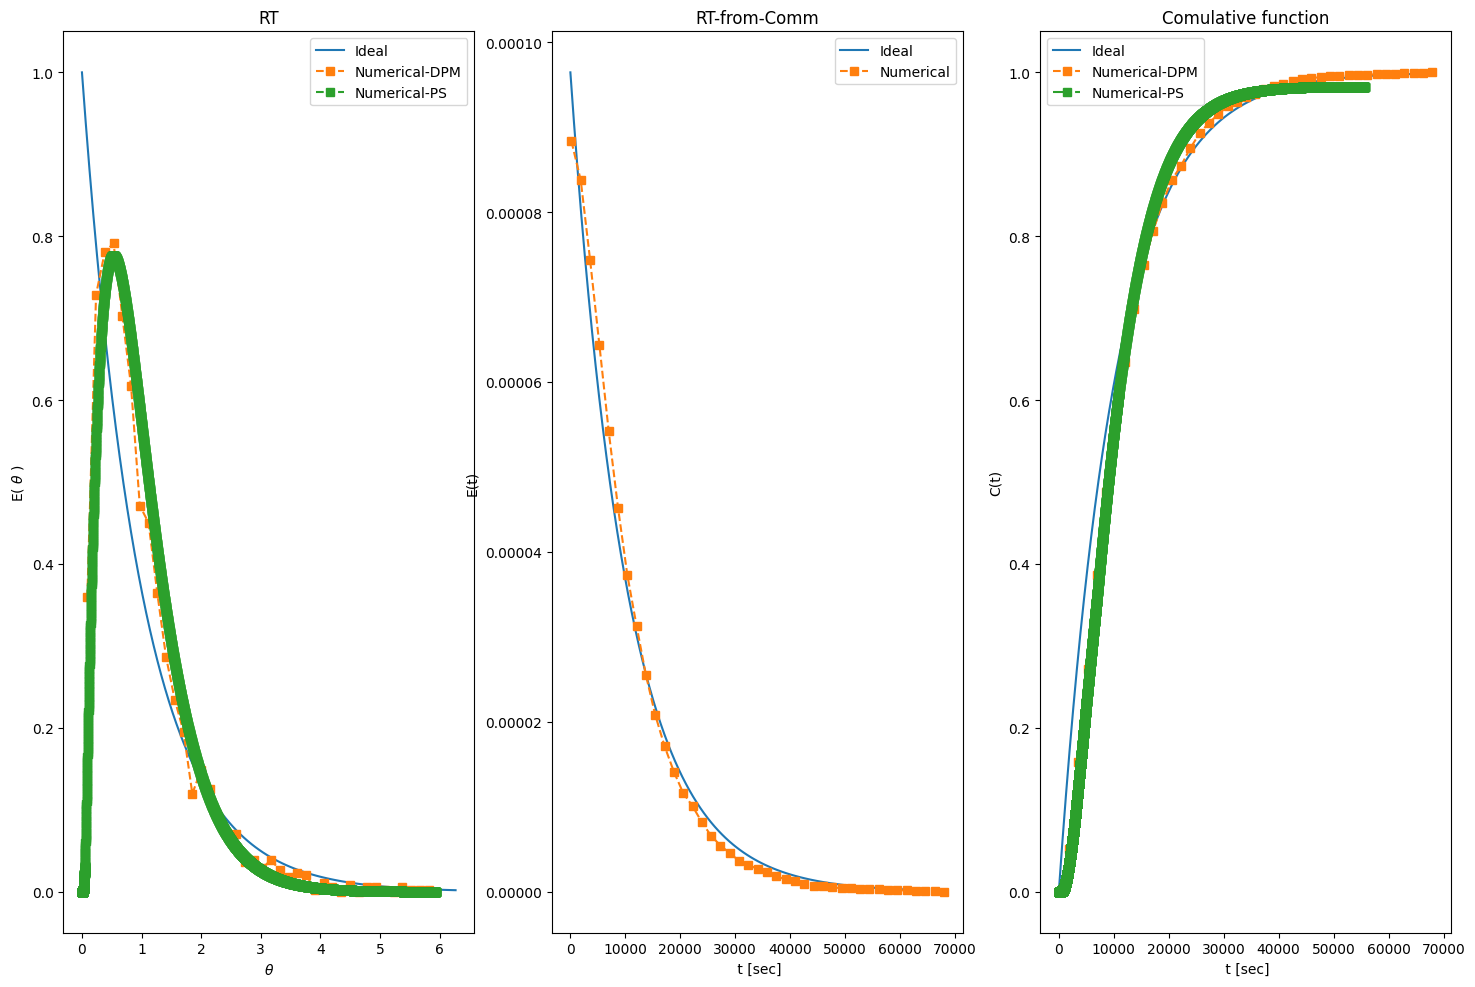

In [43]:
plt.show()

In [44]:
304/2646

0.11489040060468632

In [45]:
fig, ax2 = plt.subplots()

In [46]:
ax2.plot(t,F_t,label='Ideal')

In [47]:
ax2.plot(tnumC,C_num, linestyle='--',marker='s',label='Numerical')

In [48]:
ax2.set_xlabel(r' t [sec]')
ax2.set_ylabel(r'C(t)')
ax2.title.set_text('Cumulative function')
ax2.legend()


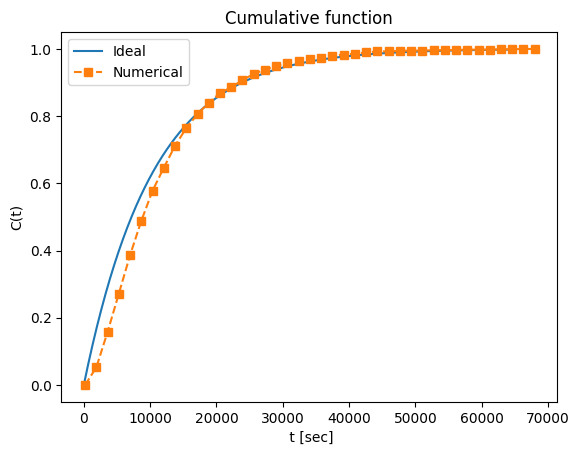

In [49]:
plt.show()

In [50]:
fig, ax3 = plt.subplots()

In [51]:
ax3.plot(teta, E_t*tau,label='Ideal')
ax3.plot(teta,E_teta_2, label='Ideal-N=2')
ax3.plot(theta_E,pdf_E*tau_num_P,linestyle='--',marker='s',color='r',label='Numerical-DPM')
ax3.plot(tnumEPS[:8000]/tau_num,E_numPS[:8000]/I0*tau_num,linestyle='--',marker='v',markevery=100,color='g',label='Numerical-Passive-Scalar')

In [52]:
ax3.legend()
ax3.set_xlabel(r'$ \theta $')
ax3.set_ylabel(r'E( $ \theta $ )')
ax3.title.set_text('RTD')

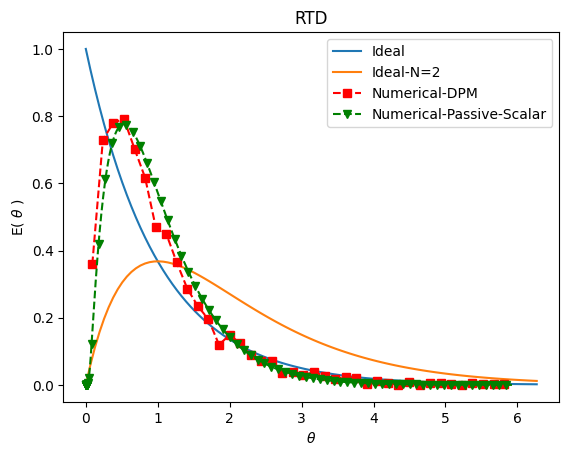

In [53]:
plt.show()

In [54]:
tau_num

array([10405.56650536])